**Task 4: Sales Prediction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()
# It is evident that sales are high when advertised on TV than Radio or Newspaper

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr()
# We can infer that correlation is high for TV against Sales

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


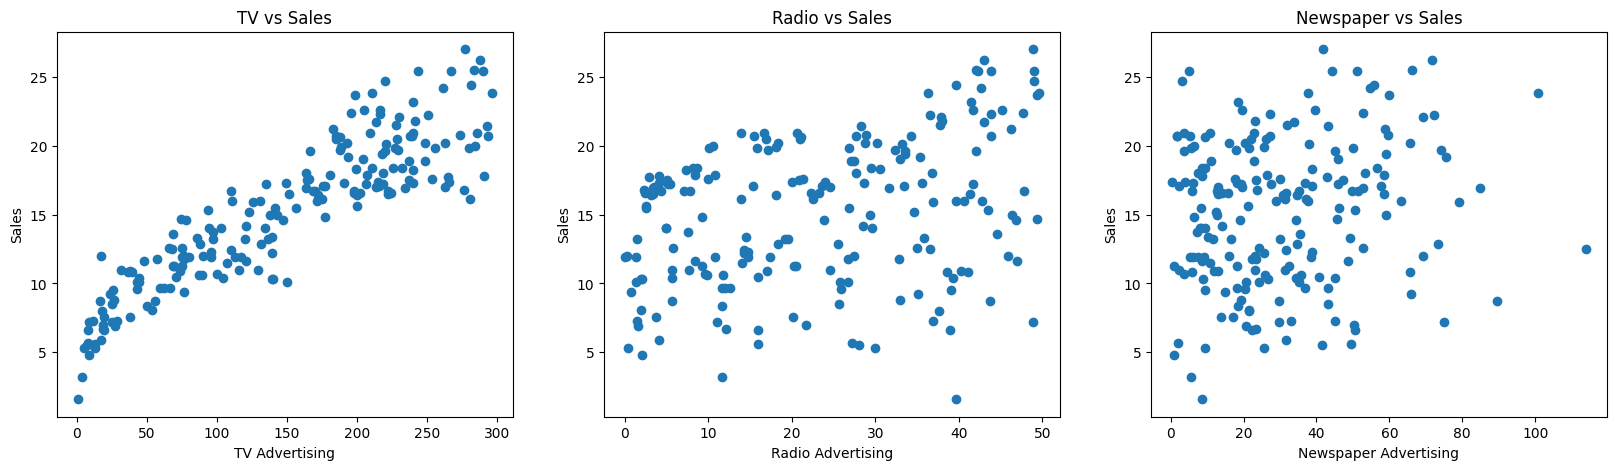

In [ ]:
# Visualization
plt.figure(figsize=(20,5))
# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

plt.show()

# We can see the steady increase in sales when it comes to TV
# However, Radio and Newspapers showcase an unsteadiness in the Sales

In [ ]:
# Taking only TV column for feature selection as its significance is more
X = df['TV']
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.2, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(X_train.head(5))

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4


In [ ]:
print(X_test.head(5))

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2


In [ ]:
print(y_train.head(5))

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1


In [ ]:
print(y_test.head(5))

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7


In [ ]:
# Getting the slope and intercept for the equation
print("Slope:", lr.coef_)
print("Intercept:",lr.intercept_)

Slope: [[0.0544343]]
Intercept: [7.16227597]


In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [ ]:
print(X_test.head(3))

       TV
18   69.2
170  50.0
107  90.4


In [ ]:
# Cross checking if we get the right prediction
# Sales = 0.0544343* TV + 7.16227597
print(0.0544343 * 69.2 + 7.16227597)
print(0.0544343 * 50.0 + 7.16227597)
print(0.0544343 * 90.4 + 7.16227597)

10.929129529999999
9.88399097
12.08313669


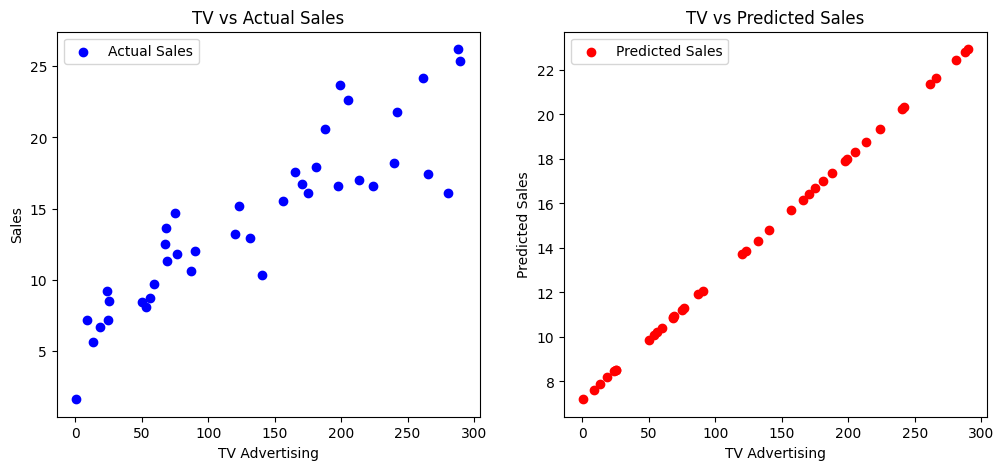

In [ ]:
# Different graphs showing the actual vs predicted sales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV vs Actual Sales')
plt.legend()

# Plot TV against predicted sales
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Predicted Sales')
plt.title('TV vs Predicted Sales')
plt.legend()

plt.show()

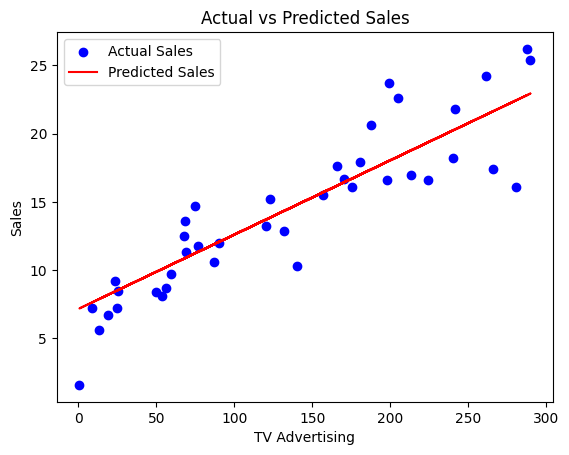

In [ ]:
# Actual vs Predicted Sales in the same graph

plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()